# Beijing Air Quality Forecasting Starter Notebook

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle==1.5.8

import os

# Create the directory if it doesn't exist
os.makedirs("C:\\Users\\Merveille\\.kaggle", exist_ok=True)

# Write kaggle.json file
with open("C:\\Users\\Merveille\\.kaggle\\kaggle.json", "w") as f:
    f.write('{"username":"merveillekangabire","key":"12573b5c7b1a50c1ad03b1d4923ba262"}')


  Using cached kaggle-1.5.8-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.7.4.5
    Uninstalling kaggle-1.7.4.5:
      Successfully uninstalled kaggle-1.7.4.5



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install python-slugify



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install --upgrade kaggle


  Using cached kaggle-1.7.4.5-py3-none-any.whl (181 kB)
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.8
    Uninstalling kaggle-1.5.8:
      Successfully uninstalled kaggle-1.5.8



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install tqdm



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!kaggle datasets list

ref                                                            title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -----------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance           Student Habits vs Academic Performance                 19512  2025-04-12 10:49:08.663000          32757        590  1.0              
adilshamim8/social-media-addiction-vs-relationships            Students' Social Media Addiction                        7851  2025-05-10 14:38:02.713000           6572         97  1.0              
b'atharvasoundankar/ai-developer-productivity-dataset            \xf0\x9f\xa7\xa0 AI Developer Productivity Dataset                     5992  2025-05-12 08:29:17                  1718         61  1.0             

In [ ]:
import zipfile
import os

zip_path = r"C:\Users\Merveille\notebooks\assignment-1-time-series-forecasting-may-2025.zip"
extract_to = r"C:\Users\Merveille\notebooks\assignment-1"

# Create the destination folder if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Unzipped successfully to:", extract_to)


✅ Unzipped successfully to: C:\Users\Merveille\notebooks\assignment-1


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU, Bidirectional
import tensorflow as tf

In [ ]:
# Mount Google Drive to access datasets
test_path = r'C:\Users\Merveille\notebooks\assignment-1\test.csv'
train_path = r'C:\Users\Merveille\notebooks\assignment-1\train.csv'


In [ ]:
# Load the datasets
# Ensure train.csv and test.csv are saved in your Google Drive in the same folder.
# Replace the file paths below with the actual paths to your dataset.
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

train.head(5)


,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,2010-01-01 00:00:00,1.448138,-0.732019,-0.522096,NaN
1,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,2010-01-01 01:00:00,1.448138,-0.732019,-0.522096,NaN
2,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,2010-01-01 02:00:00,1.448138,-0.732019,-0.522096,NaN
3,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,2010-01-01 03:00:00,1.448138,-0.732019,-0.522096,NaN
4,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,2010-01-01 04:00:00,1.448138,-0.732019,-0.522096,NaN


# Explore the training data

In this sections explore your dataset with appropiate statistics and visualisations to understand your better. Ensure that you explain output of every code cell and what it entails.

In [ ]:
# Inspecting the first few rows of the dataset to understand its structure.
print("Training Data Overview:")
train.head()

Training Data Overview:


,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,2010-01-01 00:00:00,1.448138,-0.732019,-0.522096,NaN
1,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,2010-01-01 01:00:00,1.448138,-0.732019,-0.522096,NaN
2,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,2010-01-01 02:00:00,1.448138,-0.732019,-0.522096,NaN
3,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,2010-01-01 03:00:00,1.448138,-0.732019,-0.522096,NaN
4,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,2010-01-01 04:00:00,1.448138,-0.732019,-0.522096,NaN


In [ ]:
train.columns

Index(['No', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'datetime', 'cbwd_NW',
       'cbwd_SE', 'cbwd_cv', 'pm2.5'],
      dtype='object')

In [ ]:
# Ensure 'datetime' column is in datetime format
train['datetime'] = pd.to_datetime(train['datetime'])

test['datetime'] = pd.to_datetime(test['datetime'])

# Set the 'datetime' column as the index for better time-series handling
train.set_index('datetime', inplace=True)
# val.set_index('datetime', inplace=True)
test.set_index('datetime', inplace=True)


# Handle missing values


- Check the dataset for missing values and decide how to handle them.
- In this example, missing values are filled with the mean. You can experiment with other strategies.

In [ ]:
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)


In [ ]:
train.isnull().values.any()

np.False_

# Separate features and target

- Feel free to trop any non-essential columns like that you think might not contribute to modeling.

In [ ]:
X_train = train.drop(['pm2.5', 'No'], axis=1)
y_train = train['pm2.5']

In [ ]:
# Reshape data for LSTM input
# LSTM models require data in the shape (samples, timesteps, features).
# Here, the data is reshaped to add a "timesteps" dimension.
X_train = np.expand_dims(X_train, axis=1)

# Build model

Below is a simple LSTM model. Your task is to experiment with different parameters like, numbers of layers, units, activation functions, and optimizers, etc to get the best performing model. Experiment with other optimizers (e.g., SGD) or hyperparameters to improve performance.

# model1

Using LSTM, Relu, and dropout of 0.3 

In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Dropout
# define model
model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(32, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=[lambda y, y_pred: tf.sqrt(tf.reduce_mean(tf.square(y - y_pred)))]  # RMSE metric
)

# Display the model architecture
model.summary()



C:\Users\Merveille\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 1, 128)              │          70,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          20,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,353 (360.75 KB)

 Trainable params: 92,353 (360.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
# You can adjust the number of epochs and batch size to improve performance.
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32
)

Epoch 1/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - lambda: 100.0864 - loss: 11099.7715
Epoch 2/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - lambda: 75.3273 - loss: 6007.8613
Epoch 3/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - lambda: 73.2259 - loss: 5683.2251
Epoch 4/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - lambda: 73.7003 - loss: 5749.9458
Epoch 5/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - lambda: 72.1257 - loss: 5465.8521
Epoch 6/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - lambda: 73.6682 - loss: 5747.7476
Epoch 7/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - lambda: 72.7161 - loss: 5551.3989
Epoch 8/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - lambda: 71.9896 - loss: 5481.2134
Epoch 9/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - lambda: 71.4020 - loss: 5390.2993
Epoch 10/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - lambda: 72.2116 - loss: 5527.9399
Epoch 11/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - lambda: 72.0364 - loss: 5531.9253
Epoch 1

In [ ]:
from sklearn.metrics import mean_squared_error
def evaluate_and_plot_on_train_only(model, history, X_train, y_train, scaler_y=None, model_name='Model'):
    # Predict on training data
    predictions = model.predict(X_train)
    
    # Compute training RMSE
    rmse = mean_squared_error(y_train, predictions)
    
    # Rescale if a scaler was used
    if scaler_y:
        predictions_rescaled = scaler_y.inverse_transform(predictions)
        y_train_rescaled = scaler_y.inverse_transform(y_train)
    else:
        predictions_rescaled = predictions
        y_train_rescaled = y_train

    # Plot: Actual vs Predicted
    plt.figure(figsize=(10, 5))
    plt.plot(y_train_rescaled, label='Actual')
    plt.plot(predictions_rescaled, label='Predicted')
    plt.title(f'{model_name} - Predictions vs Actuals\nRMSE: {rmse:.4f}')
    plt.xlabel('Time Step')
    plt.ylabel('Target')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot: Training loss per epoch
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.axhline(y=mean_squared_error(y_train, predictions), color='blue', linestyle='--', label='Final Train MSE')
    plt.title(f'{model_name} - Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"[{model_name}] Final Training RMSE: {rmse:.4f}")

959/959 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


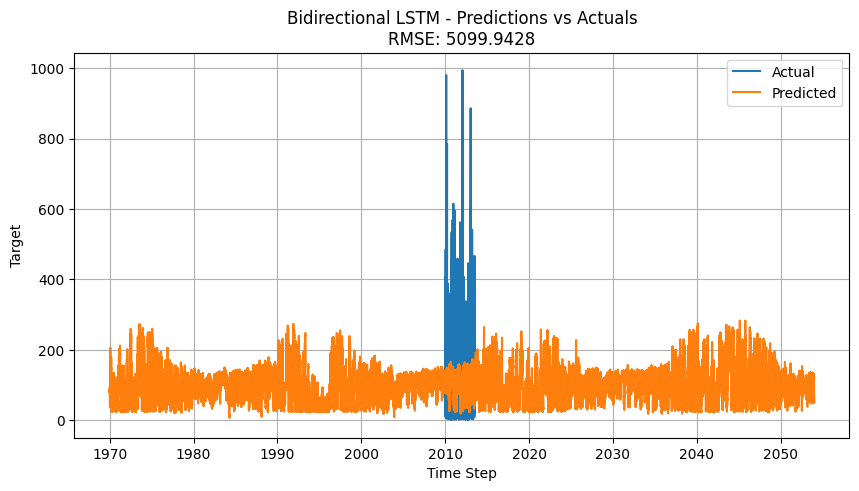

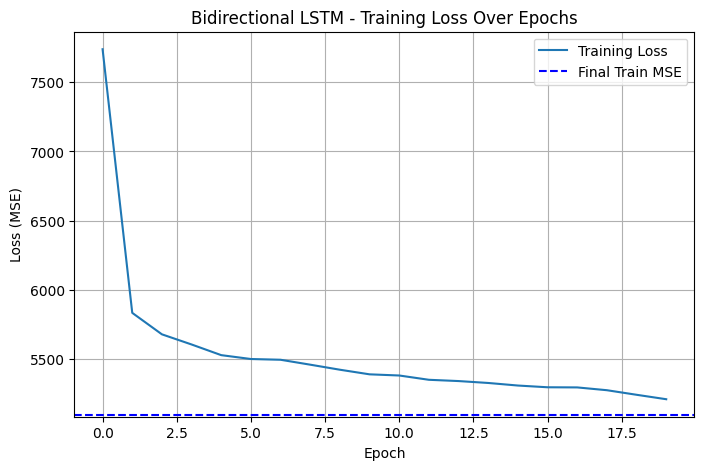

[Bidirectional LSTM] Final Training RMSE: 5099.9428


In [ ]:
evaluate_and_plot_on_train_only(
    model, history, X_train, y_train,
    scaler_y=None,
    model_name='Bidirectional LSTM'
)


# model2

This model uses a mixture of GRU and LSTM

In [ ]:
model2 = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    GRU(32, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=[lambda y, y_pred: tf.sqrt(tf.reduce_mean(tf.square(y - y_pred)))]  # RMSE metric
)

# Display the model architecture
model.summary()


C:\Users\Merveille\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 1, 128)              │          70,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          20,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 277,061 (1.06 MB)

 Trainable params: 92,353 (360.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 184,708 (721.52 KB)

In [ ]:
history = model2.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32
)

Epoch 1/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 34s 14ms/step - lambda: 100.2358 - loss: 11084.1895
Epoch 2/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - lambda: 73.3231 - loss: 5644.4458
Epoch 3/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - lambda: 73.5652 - loss: 5711.3076
Epoch 4/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - lambda: 73.3421 - loss: 5671.3447
Epoch 5/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - lambda: 72.4336 - loss: 5544.7715
Epoch 6/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - lambda: 71.5701 - loss: 5448.6108
Epoch 7/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - lambda: 72.4709 - loss: 5577.2808
Epoch 8/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - lambda: 71.3100 - loss: 5349.0366
Epoch 9/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - lambda: 71.0844 - loss: 5362.0054
Epoch 10/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - lambda: 70.7860 - loss: 5303.3525
Epoch 11/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - lambda: 71.3420 - loss: 5362.4546
Epoch 1

959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


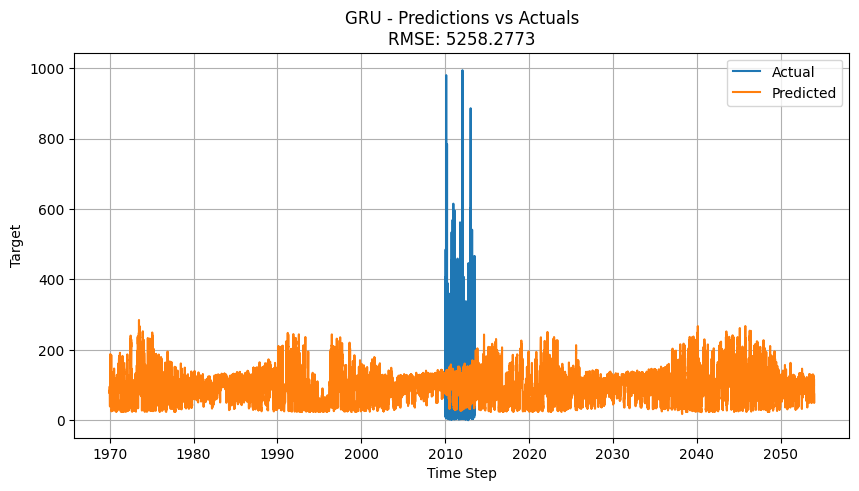

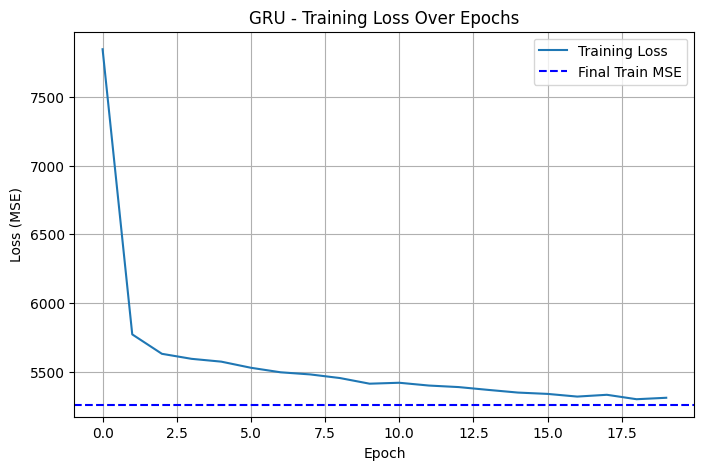

[GRU] Final Training RMSE: 5258.2773


In [ ]:
evaluate_and_plot_on_train_only(
    model2, history, X_train, y_train,
    scaler_y=None,
    model_name='GRU'
)

# model3

This model uses a mixture of GRU and  bidirectional LSTM

In [ ]:
model3 = Sequential([
    Bidirectional(LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    GRU(32, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model3.compile(
    optimizer=Adam(learning_rate=0.007),
    loss='mse',
    metrics=[lambda y, y_pred: tf.sqrt(tf.reduce_mean(tf.square(y - y_pred)))]  # RMSE metric
)

# Display the model architecture
model3.summary()

C:\Users\Merveille\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_10 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_4 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model3.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32
)

Epoch 1/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - lambda: 81.9288 - loss: 7310.3218
Epoch 2/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - lambda: 73.0515 - loss: 5646.0410
Epoch 3/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - lambda: 71.3076 - loss: 5366.6797
Epoch 4/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - lambda: 70.8433 - loss: 5320.3301
Epoch 5/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - lambda: 70.1548 - loss: 5220.5723
Epoch 6/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - lambda: 70.3988 - loss: 5239.6948
Epoch 7/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - lambda: 70.7090 - loss: 5311.6724
Epoch 8/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - lambda: 69.9339 - loss: 5193.6455
Epoch 9/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - lambda: 70.1967 - loss: 5250.7954
Epoch 10/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - lambda: 69.1794 - loss: 5049.7598
Epoch 11/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - lambda: 70.1039 - loss: 5190.4351
Epoch 12/2

959/959 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


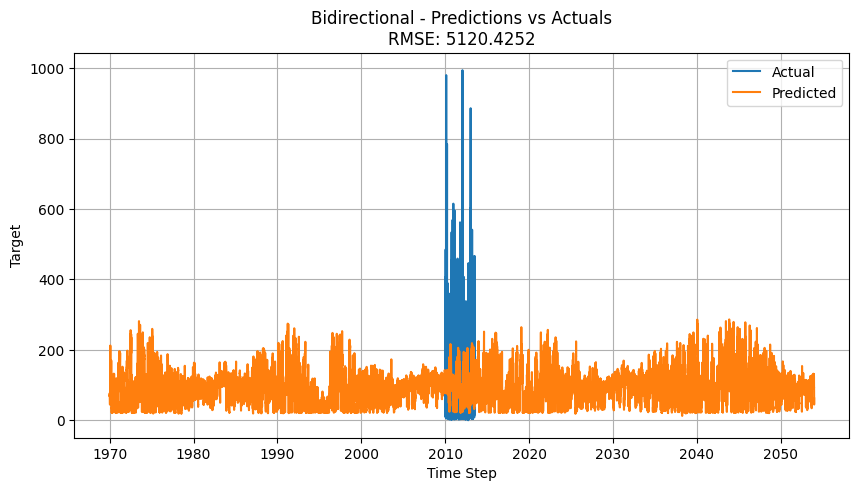

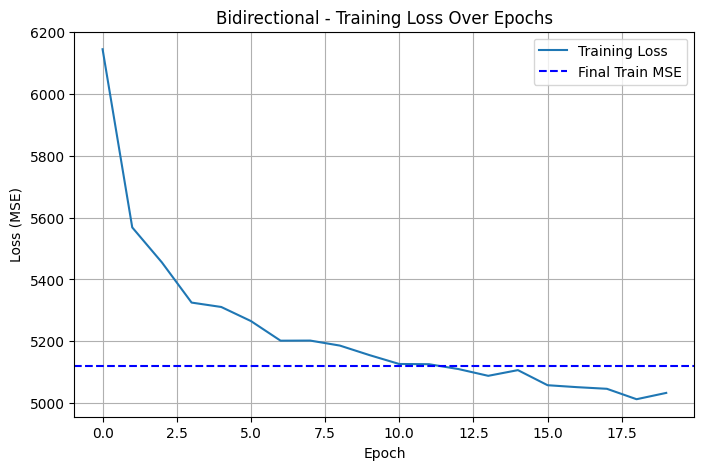

[Bidirectional] Final Training RMSE: 5120.4252


In [ ]:
evaluate_and_plot_on_train_only(
    model3, history, X_train, y_train,
    scaler_y=None,
    model_name='Bidirectional'
)

# model4

This model uses a mixture of GRU and Bidirectional LSTM, with change in compiler and learning rate 

In [ ]:
model4 = Sequential([
    Bidirectional(LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    GRU(32, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model4.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='mse',
    metrics=[lambda y, y_pred: tf.sqrt(tf.reduce_mean(tf.square(y - y_pred)))]  # RMSE metric
)

# Display the model architecture
model4.summary()

C:\Users\Merveille\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional)      │ (None, 1, 256)              │         141,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 32)                  │          27,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 510,725 (1.95 MB)

 Trainable params: 170,241 (665.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 340,484 (1.30 MB)

In [ ]:
history = model4.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32
)

Epoch 1/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - lambda: 94.7779 - loss: 9804.7441
Epoch 2/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - lambda: 72.5664 - loss: 5575.9951
Epoch 3/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - lambda: 72.0694 - loss: 5494.6665
Epoch 4/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - lambda: 71.8640 - loss: 5471.7158
Epoch 5/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - lambda: 70.1571 - loss: 5201.8091
Epoch 6/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - lambda: 71.3464 - loss: 5369.8218
Epoch 7/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - lambda: 70.4892 - loss: 5255.8354
Epoch 8/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - lambda: 71.4227 - loss: 5403.7471
Epoch 9/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - lambda: 71.9210 - loss: 5501.3818
Epoch 10/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - lambda: 71.2594 - loss: 5347.7163
Epoch 11/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - lambda: 70.0181 - loss: 5192.6426
Epoch 12

959/959 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step


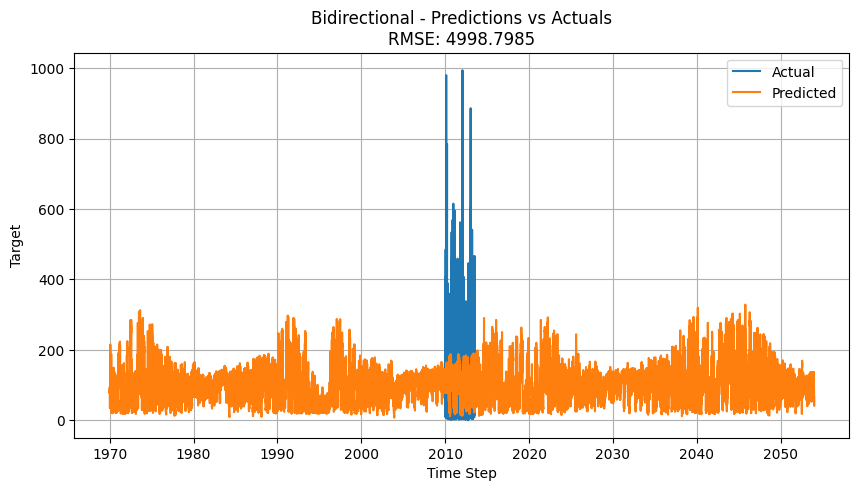

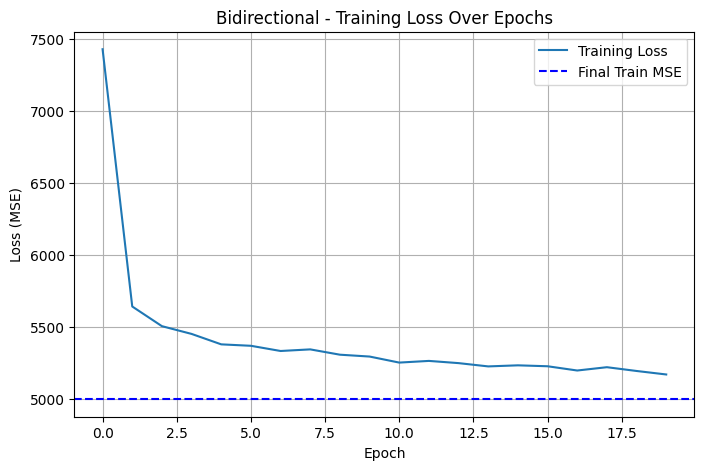

[Bidirectional] Final Training RMSE: 4998.7985


In [ ]:
evaluate_and_plot_on_train_only(
    model4, history, X_train, y_train,
    scaler_y=None,
    model_name='Bidirectional'
)

# model5

This model uses a mixture of LSTM and Bidirectional LSTM, with change in compiler and learning rate 

In [ ]:
model5 = Sequential([
    LSTM(128, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='tanh'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model5.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='mse',
    metrics=[lambda y, y_pred: tf.sqrt(tf.reduce_mean(tf.square(y - y_pred)))]  # RMSE metric
)

# Display the model architecture
model5.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                       │ (None, 1, 128)              │          70,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ (None, 32)                  │          20,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,353 (360.75 KB)

 Trainable params: 92,353 (360.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model5.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32
)

Epoch 1/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - lambda: 80.9978 - loss: 7103.2480
Epoch 2/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - lambda: 71.9127 - loss: 5466.4258
Epoch 3/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - lambda: 71.1755 - loss: 5354.8003
Epoch 4/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - lambda: 70.3017 - loss: 5260.3687
Epoch 5/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - lambda: 70.3790 - loss: 5272.9478
Epoch 6/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - lambda: 69.9166 - loss: 5164.7363
Epoch 7/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - lambda: 70.1104 - loss: 5228.8643
Epoch 8/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - lambda: 68.3005 - loss: 4915.2432
Epoch 9/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - lambda: 69.3443 - loss: 5064.1030
Epoch 10/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - lambda: 69.1408 - loss: 5065.1934
Epoch 11/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - lambda: 69.1082 - loss: 5028.7749
Epoch 12/20
959/959 ━━━━━━━━━

959/959 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


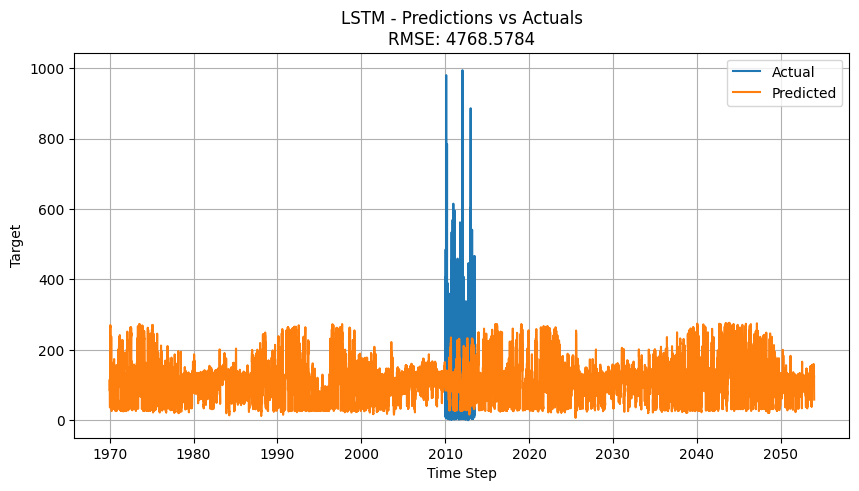

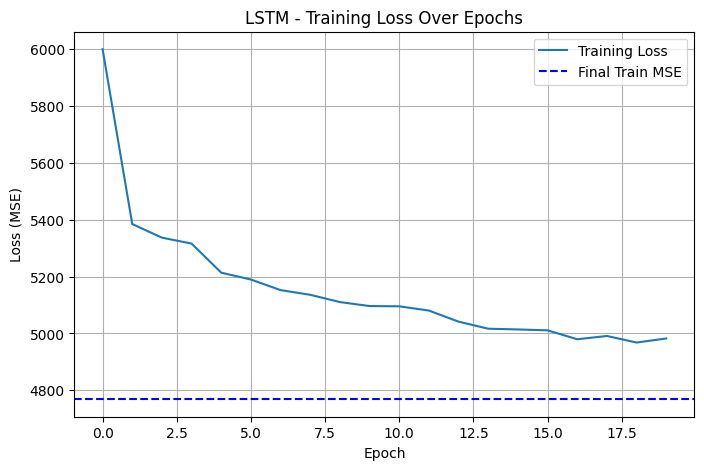

[LSTM] Final Training RMSE: 4768.5784


In [ ]:
evaluate_and_plot_on_train_only(
    model5, history, X_train, y_train,
    scaler_y=None,
    model_name='LSTM'
)

In [ ]:
model6 = Sequential([
    Bidirectional(LSTM(80, activation='tanh', return_sequences=True, dropout=0.25, recurrent_dropout=0.15)),
    Bidirectional(LSTM(40, activation='tanh', return_sequences=False, dropout=0.25, recurrent_dropout=0.15)),
    Dense(20, activation='relu'),
    Dropout(0.15),
    Dense(1)
])

model6.compile(
    optimizer=Adam(learning_rate=0.0007),
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')]
)

# Display the model architecture
model6.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_8 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model6.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32
)

Epoch 1/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 51s 15ms/step - loss: 12361.2939 - rmse: 110.3914
Epoch 2/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 6541.2324 - rmse: 80.8641
Epoch 3/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - loss: 6276.7207 - rmse: 79.2210
Epoch 4/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 5952.3828 - rmse: 77.1427
Epoch 5/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - loss: 6154.4819 - rmse: 78.4366
Epoch 6/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - loss: 5975.6260 - rmse: 77.2952
Epoch 7/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 6090.2471 - rmse: 78.0241
Epoch 8/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 5740.0303 - rmse: 75.7548
Epoch 9/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 5837.0488 - rmse: 76.3851
Epoch 10/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - loss: 5780.1255 - rmse: 76.0238
Epoch 11/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 5728.1445 - rmse: 75.6603
Epoch 12/20
959/959 ━━━━━━━━

959/959 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


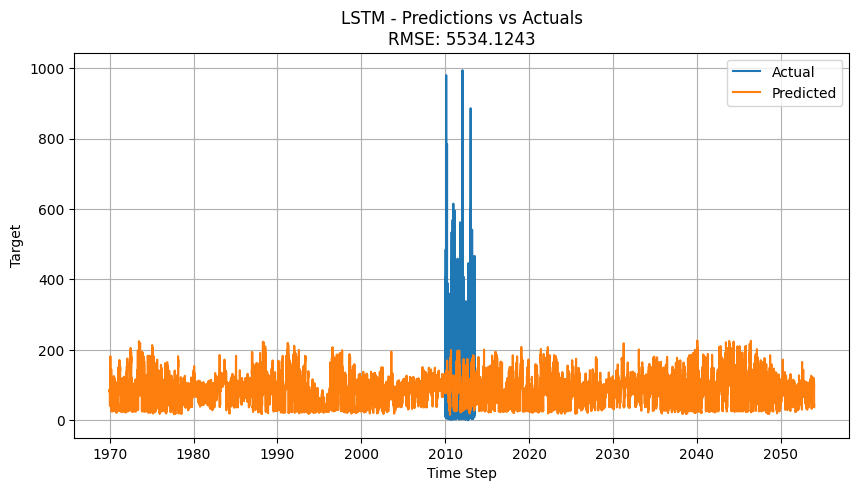

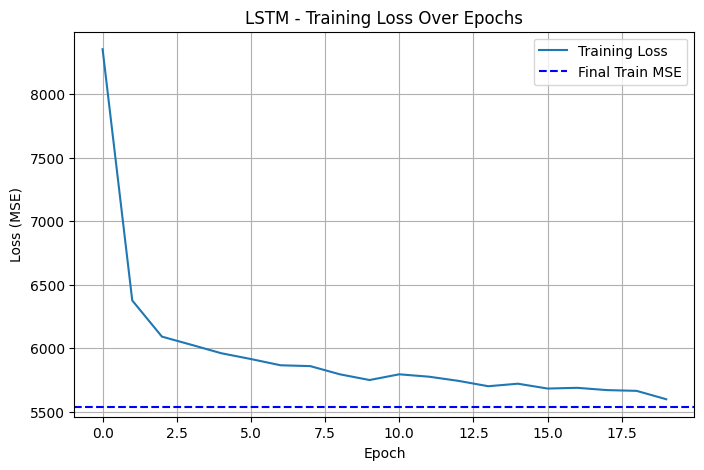

[LSTM] Final Training RMSE: 5534.1243


In [ ]:
evaluate_and_plot_on_train_only(
    model5, history, X_train, y_train,
    scaler_y=None,
    model_name='LSTM'
)

In [ ]:
# Prepare the test data
os.makedirs(r"C:\Users\Merveille\notebooks\assignment-1\data", exist_ok=True)

# Prepare the test data
X_test = test.drop(['No'], axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Make predictions on the test set using the trained model
predictions = model.predict(X_test)

# Clean predictions
predictions = np.nan_to_num(predictions)
predictions = np.round(predictions).astype(int)

# Make sure number of predictions matches number of row IDs
assert len(predictions.flatten()) == len(sample_submission), "Mismatch between prediction count and row IDs"

# Create submission DataFrame
submission = pd.DataFrame({
    'row ID': test.index.strftime('%Y-%m-%d') + ' ' + test.index.hour.astype(str) + ':' + test.index.strftime('%M:%S'),
    'pm2.5': predictions.flatten()
})

# Save to CSV
submission_path = r"C:\Users\Merveille\notebooks\assignment-1\data\first_submission.csv"
submission.to_csv(submission_path, index=False)

# Submit to Kaggle
!kaggle competitions submit -c assignment-1-time-series-forecasting-may-2025 -f "C:/Users/Merveille/notebooks/assignment-1/data/first_submission.csv" -m "Test Submitted"

411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Successfully submitted to Assignment 1- Time Series Forecasting May 2025



  0%|          | 0.00/308k [00:00<?, ?B/s]
  5%|5         | 16.0k/308k [00:00<00:03, 83.0kB/s]
 73%|#######2  | 224k/308k [00:00<00:00, 918kB/s]  
100%|##########| 308k/308k [00:01<00:00, 179kB/s]
